# Simple Perceptron From Scratch

L'objectif de ce notebook est de construire un **perceptron** From Scratch (en partant de zéro). 

Le perceptron est le modèle le plus de **réseau de neurones artificiels** car ne possédant qu'une **seule couche**. Il n'a qu'une seule sortie (booléenne) à laquelle toutes les entrées (inputs) sont connectées (en appliquant une somme pondérée).

La fonction d'activation (ou de transfert) est une fonction continue qui transforme la somme pondérée des inputs. A partir de ce résultat, on en déduit la sortie (output) du réseau. 

On peut citer comme fonctions d'activation la **unit step function (ou Heaviside)** et la **sigmoid function**.

Le schéma d'un perceptron est comme suit :

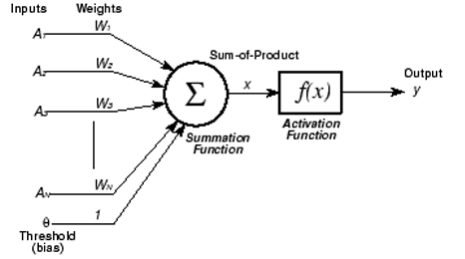

L'algorithme de construction d'un perceptron est le suivant :

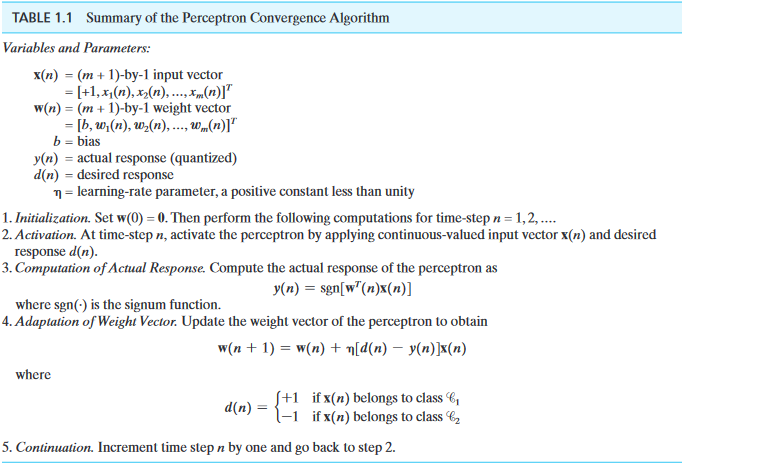

Les poids des inputs sont mis à jour à chaque étape (par Stochastic Gradient Descent). Plusieurs critères d'arrêt peuvent être définis. On fixera un nombre maximal d'itérations (**nb_iterations**) et le **learning_rate**

On choisira comme fonction d'activation la **unit step function**

Concernant les datasets, on choisira :
1. de simuler un dataset de classification binaire à 2 features (avec la fonction `sklearn.datasets.make_blobs`) n_sample = 100
2. d'utiliser la dataset IRIS pour prédire la classe d'appartenance (Versicolor / Setosa) à  partir d'un perceptron

On pourra également comparer les poids estimés à ceux en sortie de la fonction ``sklearn.linear_model.Perceptron``


###  1. Import des librairies et Chargement (ou simulation) des datasets

In [7]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

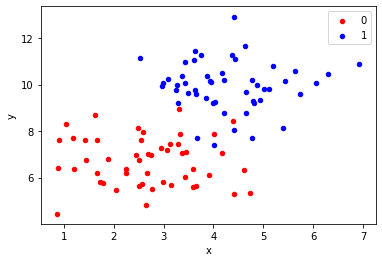

In [2]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2)

 

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


### 2. Etapes de construction du perceptron

1. Coder la fonction **predict(W,X)** qui calcule $W.X +b$ (b désigne le biais) pour chaque observation et renvoie 1 si le signe est positif 0 sinon

In [5]:
b = 0
W = np.zeros(X.shape[1]) 

 

def predict (W, X):
    
    operation = np.dot(W.T, X) + b
    
    result = (operation >= 0).astype(int)
        
    return result



1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [12]:
data = load_iris()

X = data.data
y = data.target

In [17]:
y_bis = np.where(y == 0 , 0, 1 )

In [19]:
y_bis

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

2. Coder la fonction **fit(X, Y, n_iterations,learning_rate)** qui met à jour W et b à chaque itération (formule dans l'algo ci-dessus)
A l'étape initiale, b = 0 et W = np.zeros(X.shape[1])
b est associé à la variable constante (valeurs égales à 1)

In [21]:
def fit(X, Y, n_iterations,learning_rate):
    W = np.zeros(X.shape[1])
    for i in range(n_iterations):
        b = 0
        for row in range(X.shape[0]):
            predict = predict(Y,[row])
            b = X[row] - predict
            
    
def train_weights(train, l_rate, n_iterations):
	weights = [0.0 for i in range(len(train[0]))]
	for iteration in range(n_iterations):
		sum_error = 0.0
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			sum_error += error**2
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return weights

3.**Bonus** Créer un objet **Perceptron** qui intègre les fonctions ci-dessus 

4. Construire un perceptron sur le dataset simulé et afficher la frontière de décision sur le scatterplot des données
Idem pour le dataset IRIS (en sélectionnant 2 features)
Comparer les poids estimés avec ceux de la fonction `sklearn.linear_model.Perceptron`